In [ ]:
import sqlalchemy

In [ ]:
!pip install pymysql

     |████████████████████████████████| 43 kB 1.1 MB/s 


In [ ]:
from sqlalchemy import create_engine

In [ ]:
import pandas as pd 

In [ ]:
db_host = '18.136.157.135'
username = 'dm_usdata_sql'
user_pass = '37z<49REb&mKnl4AV!vJ'
db_name = 'project_service_data'

conn = create_engine('mysql+pymysql://'+username+':'+user_pass+'@'+db_host+'/'+db_name)
conn.table_names()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  import sys


['service_data']

In [ ]:
query = "select * from service_data" # SQL statement
data = pd.read_sql(query,conn)
print(data.shape)
data.head()

(28482, 7)


,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,30-05-17,30-05-17,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,ENGINE OIL
1,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,ENGINE OIL
2,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,POLISH
3,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CONSUMABLES
4,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,COOLANT OIL


In [ ]:
data.dtypes

invoice_date             object
job_card_date            object
business_partner_name    object
vehicle_no               object
vehicle_model            object
current_km_reading       object
invoice_line_text        object
dtype: object

In [ ]:
data.to_csv('inv.csv')
from google.colab import files
files.download("inv.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
# Reading the input
inventory = pd.read_csv('/content/gdrive/MyDrive/Sample-data/inv.csv')
inventory.head()    

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Unnamed: 0,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,0,30-05-17,30-05-17,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,ENGINE OIL
1,1,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,ENGINE OIL
2,2,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,POLISH
3,3,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CONSUMABLES
4,4,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,COOLANT OIL


In [ ]:
inventory.drop('Unnamed: 0',inplace=True,axis=1)
inventory.head()

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,30-05-17,30-05-17,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,ENGINE OIL
1,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,ENGINE OIL
2,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,POLISH
3,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CONSUMABLES
4,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,COOLANT OIL


In [ ]:
inventory.shape

(28482, 7)

In [ ]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28482 entries, 0 to 28481
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   invoice_date           28482 non-null  object
 1   job_card_date          28482 non-null  object
 2   business_partner_name  28482 non-null  object
 3   vehicle_no             28482 non-null  object
 4   vehicle_model          28482 non-null  object
 5   current_km_reading     28482 non-null  int64 
 6   invoice_line_text      28448 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.5+ MB


In [ ]:
inventory.describe()

,current_km_reading
count,28482.000000
mean,19348.003827
std,25246.722306
min,0.000000
25%,3988.000000
50%,12420.500000
75%,27905.000000
max,610112.000000


In [ ]:
inventory.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
28477    False
28478    False
28479    False
28480    False
28481    False
Length: 28482, dtype: bool

In [ ]:
inventory[inventory.duplicated()].count()

invoice_date             383
job_card_date            383
business_partner_name    383
vehicle_no               383
vehicle_model            383
current_km_reading       383
invoice_line_text        367
dtype: int64

In [ ]:
inventory.isnull().sum()

invoice_date              0
job_card_date             0
business_partner_name     0
vehicle_no                0
vehicle_model             0
current_km_reading        0
invoice_line_text        34
dtype: int64

In [ ]:
print(inventory.shape)
inventory.dropna(inplace=True)
print('shape of data after droping null values =',inventory.shape)

(28482, 7)
shape of data after droping null values = (28448, 7)


In [ ]:
for j in ['invoice_line_text']:
    print(f'unique[{j}] count:',inventory[j].describe())

unique[invoice_line_text] count: count          28448
unique           502
top       ENGINE OIL
freq            3802
Name: invoice_line_text, dtype: object


In [ ]:
for j in ['vehicle_model']:
    print(f'unique[{j}] count:',inventory[j].describe())

unique[vehicle_model] count: count                28448
unique                  28
top       BAJAJ PULSAR 150
freq                  8614
Name: vehicle_model, dtype: object


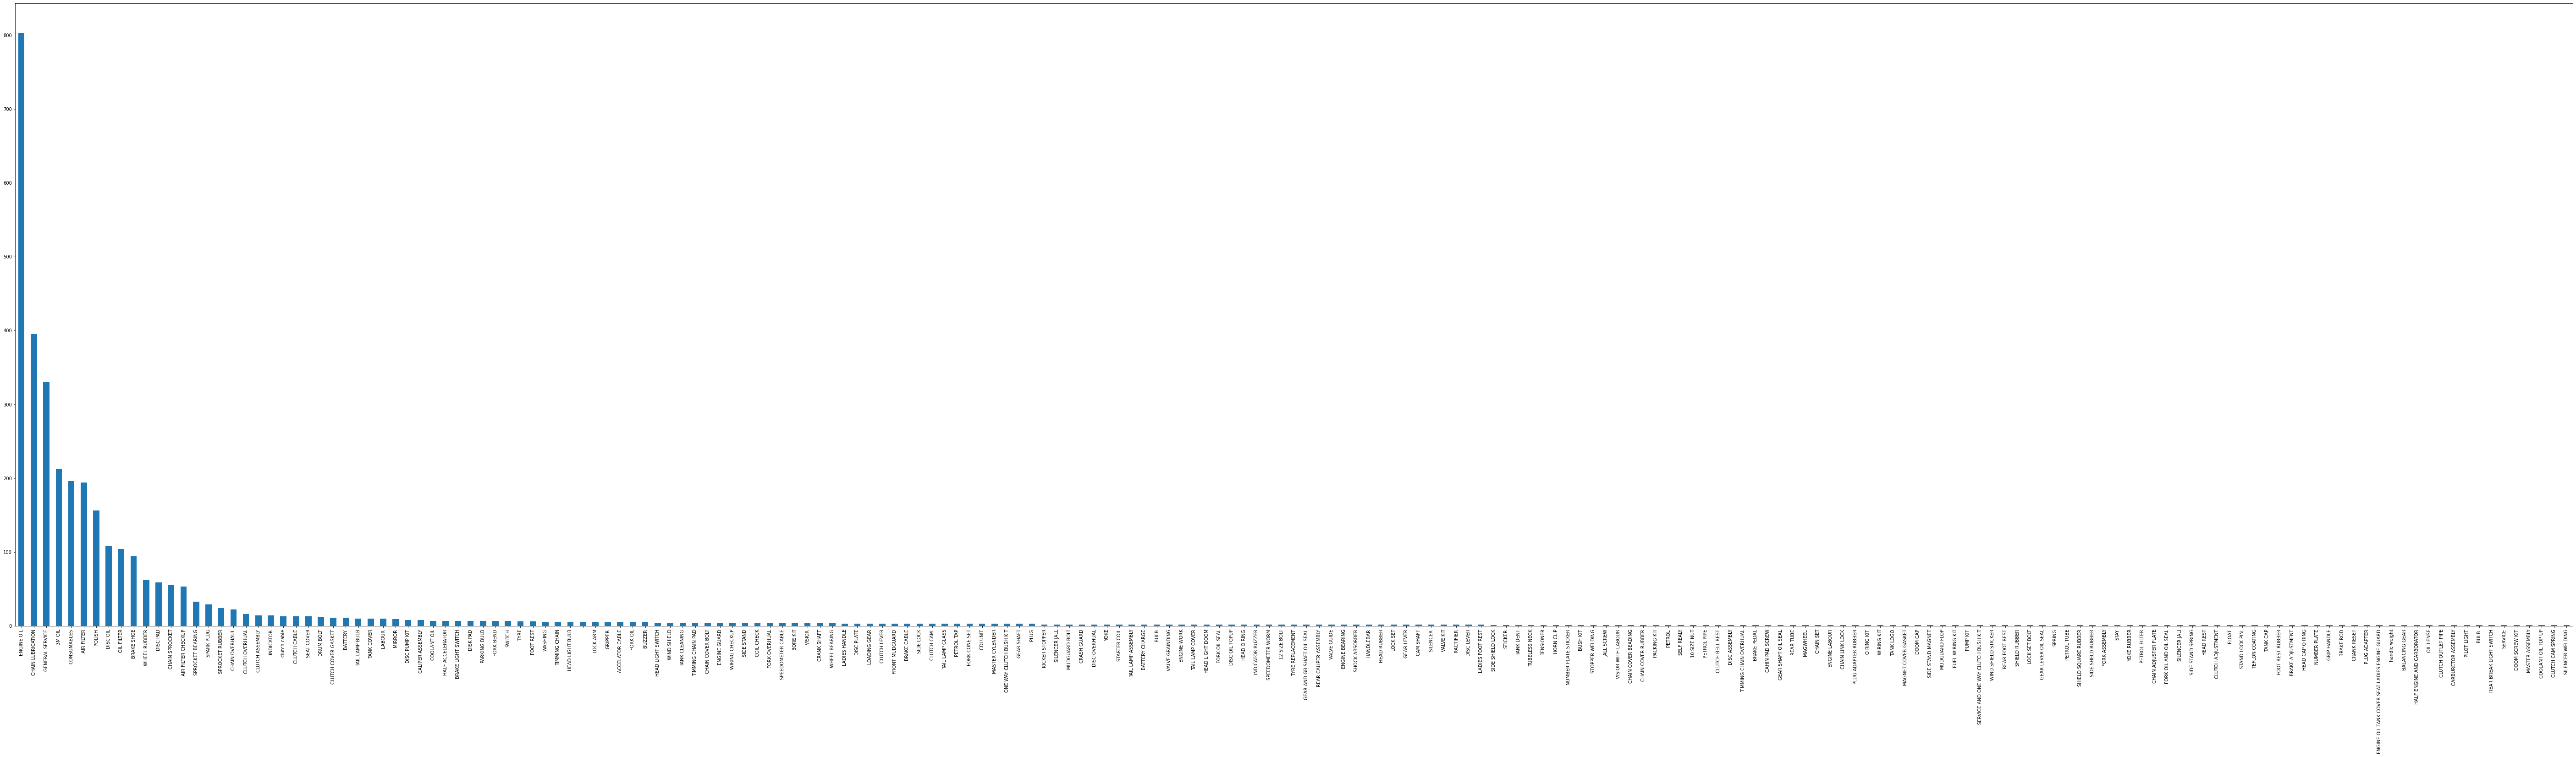

In [ ]:
plt.figure(figsize=(100,25))
data.groupby('current_km_reading')['invoice_line_text'].first().value_counts().plot.bar()

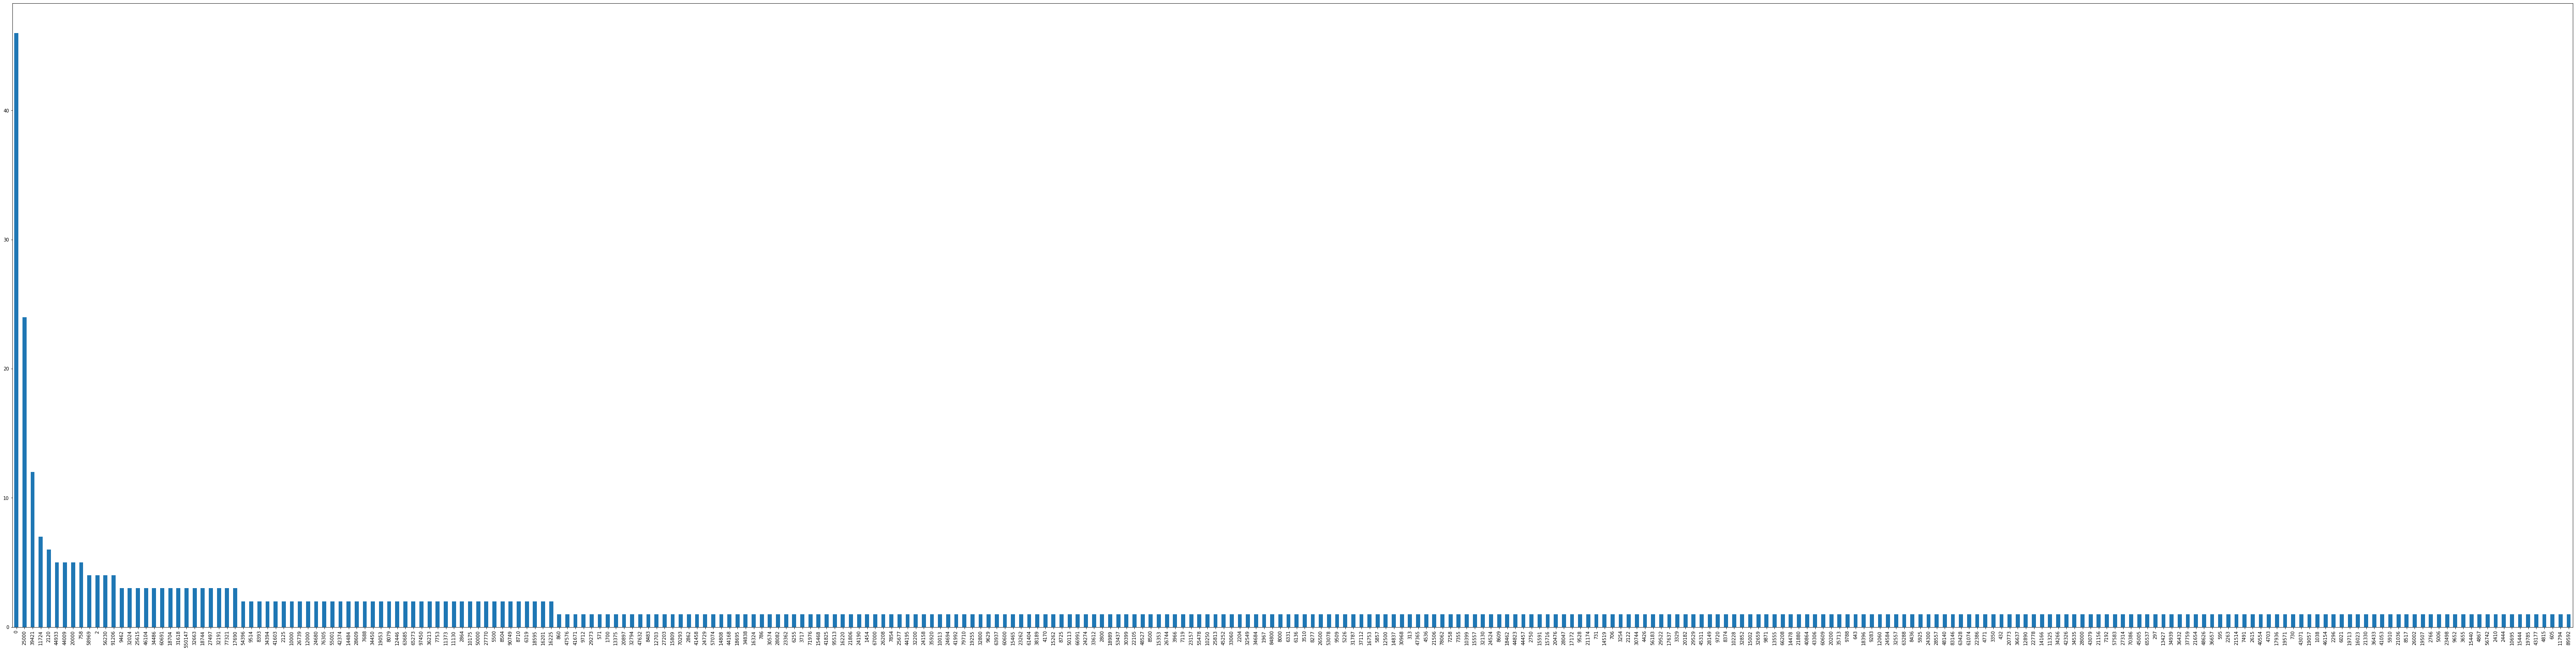

In [ ]:
plt.figure(figsize=(100,25))
data.groupby('invoice_line_text')['current_km_reading'].first().value_counts().plot.bar()

In [ ]:
inventory.vehicle_model.unique()

array(['BAJAJ AVENGER STREET 220', 'BAJAJ PULSAR NS 200', 'BAJAJ PLATINA',
       'BAJAJ V', 'BAJAJ PULSAR 150', 'BAJAJ PULSAR 220',
       'BAJAJ PULSAR 180', 'BAJAJ AVENGER STREET', 'BAJAJ CT 100',
       'BAJAJ DISCOVER', 'BAJAJ PULSAR LS135', 'BAJAJ DISCOVER 125',
       'BAJAJ V150', 'BAJAJ BOXER CT', 'BAJAJ PULSAR RS 200',
       'BAJAJ DISCOVER 150', 'BAJAJ PULSAR AS 200', 'BAJAJ XCD 125',
       'BAJAJ V125', 'BAJAJ WIND 125', 'BAJAJ DISCOVER 135',
       'BAJAJ PULSAR NS 160', 'BAJAJ CALIBER', 'BAJAJ XCD 135', 'WAVE',
       'BAJAJ AVENGER STREET 180', 'BAJAJ V15', 'BAJAJ DOMINAR 400 ABS'],
      dtype=object)

In [ ]:
inventory.invoice_line_text.unique()

array(['ENGINE OIL', 'POLISH', 'CONSUMABLES', 'COOLANT OIL',
       'CHAIN LUBRICATION', '4 WAY SWITCH', '3M OIL', 'GENERAL SERVICE',
       'OIL FILTER', 'INDICATOR', 'HEAD REST', 'VALVE GUIDE',
       'TIMMING CHAIN', 'FOOT REST', 'LOW BEAM BULB', 'VALVE GRAINDING',
       'DISC PAD', 'LOADING GEAR', 'PACKING KIT', 'TIMMING CHAIN PAD',
       'TENSIONER', 'CLUTCH BELL REST', 'CLUTCH ASSEMBLY', 'VALVE KIT',
       'SPARK PLUG', 'ONE WAY CLUTCH', 'BORE KIT', 'AIR FILTER',
       'HEAD RUBBER', 'CLUTCH CABLE', 'CRANK SHAFT', 'BRAKE ADJUSTMENT',
       'BRAKE SHOE', 'AIR FILTER CHECKUP', 'DRUM BOLT WASHER',
       'TANK CLEANING', 'FORK BEND', 'GEAR SHAFT', 'CLUTCH COVER GASKET',
       'INDICATOR BULB', 'GEAR LEVER', 'HANDLEBAR', 'CRASH GUARD',
       'FORK OIL SEAL', 'FORK OIL', 'SIDE SHIELD', 'VISIOR',
       'FORK CONE SET', 'HEAD LIGHT DOOM', 'TANK ASSEMBLY',
       'Clutch cable', 'DISC LEVER', 'CARBURETOR CLEANING', 'SEAT COVER',
       'BUZZER', 'TAIL LAMP BULB', 'DISC OIL', 'DIS

In [ ]:
inventory.current_km_reading.unique()

array([50000,   758,  3717, ...,  2914,  3425, 12805])

<Figure size 5760x1440 with 0 Axes>

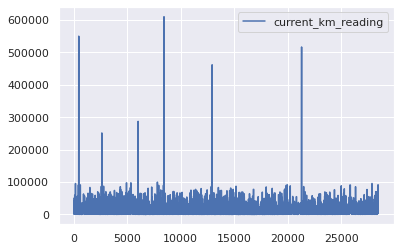

In [ ]:
inventory.plot()

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
inventory.vehicle_model = enc.fit_transform(inventory.vehicle_model)
inventory.invoice_line_text = enc.fit_transform(inventory.invoice_line_text)

In [ ]:
inventory.head()

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,30-05-17,30-05-17,shivXXXXXXXXXX,KA03MFXXXX,2,50000,148
1,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,18,758,148
2,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,18,758,346
3,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,18,758,108
4,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,18,758,109
